## PyVT: A toolkit for preprocessing and analysis of vessel spatio-temporal trajectories

### Data analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from vincenty import vincenty 

In [3]:
# Charger les données AIS depuis un fichier CSV
ais_data = pd.read_csv('ais_data.csv')
ais_data.head()

,Unnamed: 0,mmsi,navigationalstatus,sog,cog,heading,shiptype,width,length,draught
0,0,219019621,Unknown value,0.0,86.0,86.0,Fishing,4.0,9.0,NaN
1,1,265628170,Unknown value,0.0,334.5,NaN,Port tender,8.0,27.0,NaN
2,2,219005719,Unknown value,0.0,208.7,NaN,Fishing,4.0,11.0,NaN
3,3,219028066,Unknown value,0.0,NaN,NaN,Pleasure,3.0,12.0,NaN
4,4,212584000,Moored,0.0,153.0,106.0,Cargo,13.0,99.0,6.3


In [4]:
ais_data.describe()

,Unnamed: 0,mmsi,sog,cog,heading,width,length,draught
count,358351.000000,3.583510e+05,357893.000000,355182.000000,337737.000000,354640.000000,354608.000000,332808.000000
mean,186757.775285,2.939678e+08,12.122554,189.064529,190.076829,19.947854,124.971549,6.571402
std,112181.601870,1.213866e+08,9.355851,107.588825,107.107604,10.808627,71.268183,2.934392
min,0.000000,9.112856e+06,0.000000,0.000000,0.000000,1.000000,2.000000,0.400000
25%,89587.500000,2.195780e+08,9.200000,116.300000,120.000000,12.000000,83.000000,4.600000
50%,179947.000000,2.486590e+08,11.300000,168.700000,170.000000,17.000000,115.000000,6.100000
75%,283503.500000,3.046650e+08,13.300000,300.175000,303.000000,28.000000,181.000000,7.900000
max,387581.000000,9.921950e+08,214.000000,359.900000,507.000000,78.000000,690.000000,25.500000


In [5]:
ais_data.shape

(358351, 10)

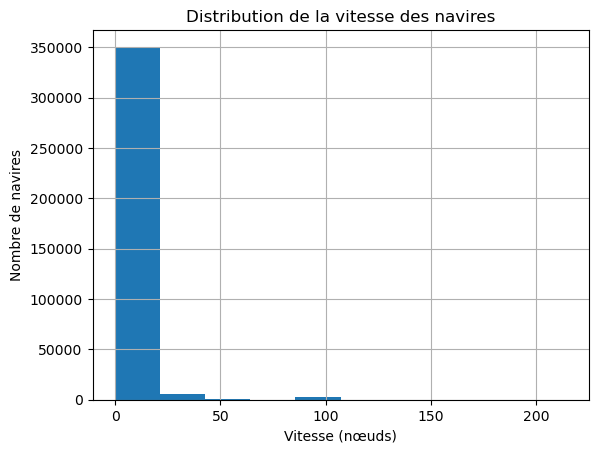

In [6]:
import matplotlib.pyplot as plt

# Chargez les données AIS
ais_data = pd.read_csv("ais_data.csv")

# Créez un histogramme de la vitesse
ais_data["sog"].hist()

# Ajoutez un titre
plt.title("Distribution de la vitesse des navires")

# Ajoutez une étiquette à l'axe des x
plt.xlabel("Vitesse (nœuds)")

# Ajoutez une étiquette à l'axe des y
plt.ylabel("Nombre de navires")

# Afficher l'histogramme
plt.show()

In [7]:
pd.DataFrame(ais_data.isna().sum())

,0
Unnamed: 0,0
mmsi,0
navigationalstatus,0
sog,458
cog,3169
heading,20614
shiptype,0
width,3711
length,3743
draught,25543


In [8]:
ais_data = ais_data.dropna()

In [9]:
ais_data.shape

(326633, 10)

In [10]:
pd.DataFrame(ais_data.isna().sum())

,0
Unnamed: 0,0
mmsi,0
navigationalstatus,0
sog,0
cog,0
heading,0
shiptype,0
width,0
length,0
draught,0


In [11]:
ais_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326633 entries, 4 to 358350
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          326633 non-null  int64  
 1   mmsi                326633 non-null  int64  
 2   navigationalstatus  326633 non-null  object 
 3   sog                 326633 non-null  float64
 4   cog                 326633 non-null  float64
 5   heading             326633 non-null  float64
 6   shiptype            326633 non-null  object 
 7   width               326633 non-null  float64
 8   length              326633 non-null  float64
 9   draught             326633 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 27.4+ MB


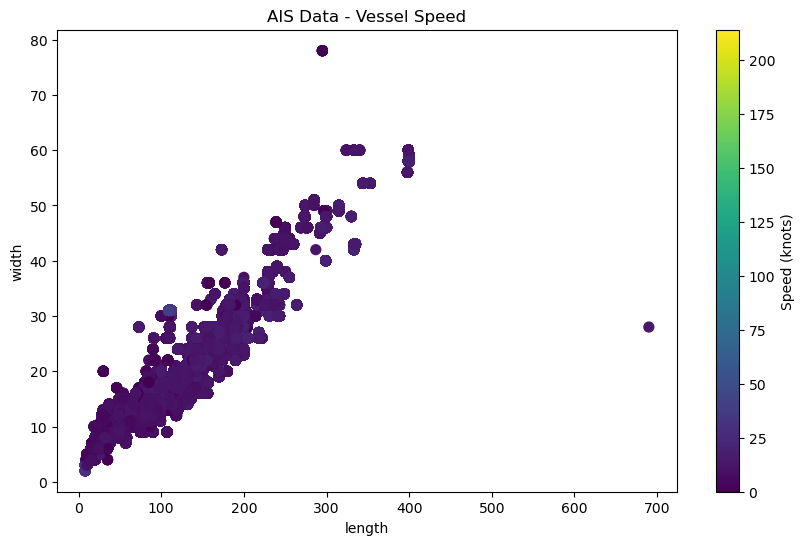

In [12]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(ais_data['length'], ais_data['width'], c=ais_data['sog'], cmap='viridis', s=50)
plt.colorbar(label='Speed (knots)')
plt.title('AIS Data - Vessel Speed')
plt.xlabel('length')
plt.ylabel('width')
plt.show()

In [13]:
# "sampling" to reduce the number of points in the trajectory
compressed_ais = ais_data.iloc[::2]

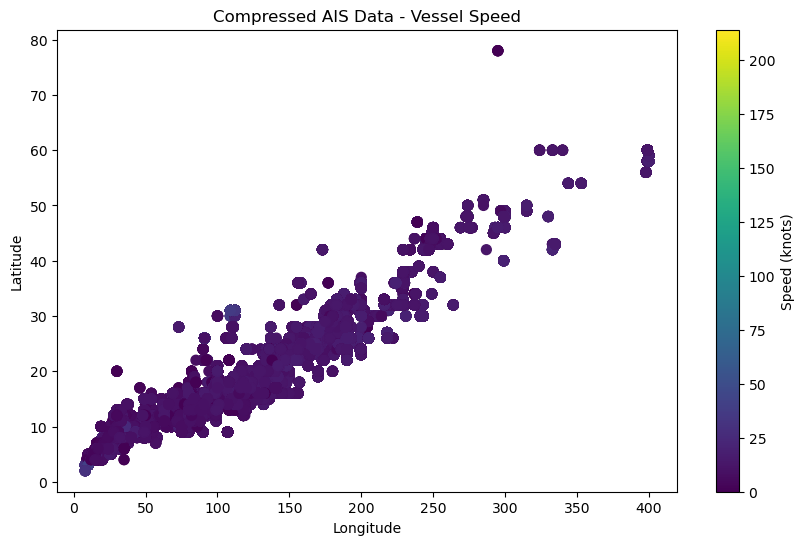

In [14]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(compressed_ais['length'], compressed_ais['width'], c=compressed_ais['sog'], cmap='viridis', s=50)
plt.colorbar(label='Speed (knots)')
plt.title('Compressed AIS Data - Vessel Speed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

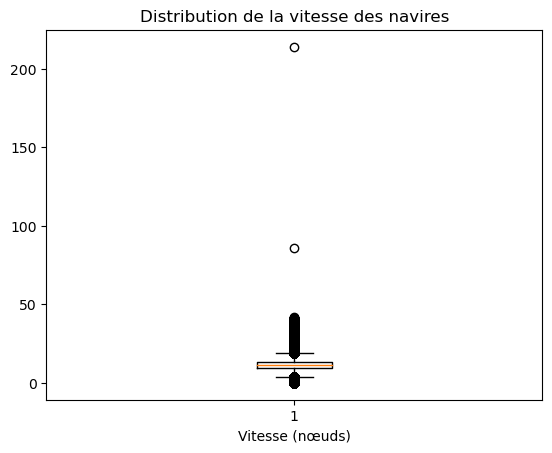

In [59]:
# Créez un boxplot de la vitesse
plt.boxplot(ais_data["sog"])

# Ajoutez un titre
plt.title("Distribution de la vitesse des navires")

# Ajoutez une étiquette à l'axe des x
plt.xlabel("Vitesse (nœuds)")

# Afficher le boxplot
plt.show()

In [60]:
# Identifier les valeurs aberrantes dans la colonne 'SOG' (Speed Over Ground)
Q1 = ais_data['sog'].quantile(0.25)
Q3 = ais_data['sog'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Supprimer les lignes avec des valeurs aberrantes
ais_data = ais_data[(ais_data['sog'] >= lower_bound) & (ais_data['sog'] <= upper_bound)]


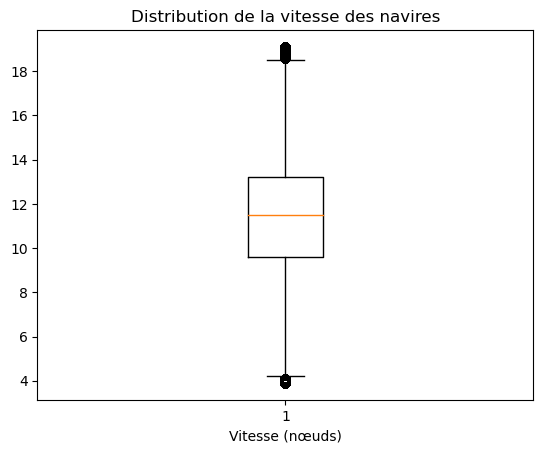

In [61]:
# Créez un boxplot de la vitesse
plt.boxplot(ais_data["sog"])

# Ajoutez un titre
plt.title("Distribution de la vitesse des navires")

# Ajoutez une étiquette à l'axe des x
plt.xlabel("Vitesse (nœuds)")

# Afficher le boxplot
plt.show()

In [41]:
# Supprimer les lignes en double basées sur toutes les colonnes
ais_data.drop_duplicates(inplace=True)

## exemple de création df

In [26]:
# Sample AIS data
data = {
    'Timestamp': ['2023-01-01 00:00:00', '2023-01-01 01:00:00', '2023-01-01 02:00:00'],
    'VesselID': ['Vessel1'] * 3,
    'Latitude': [34.0522, 34.0567, 34.0615],
    'Longitude': [-118.2437, -118.2480, -118.2555],
    'Speed': [10.5, 11.2, 10.8],
    'Course': [120, 122, 118]
}

# Create DataFrame
df = pd.DataFrame(data)

In [27]:
df.head()

,Timestamp,VesselID,Latitude,Longitude,Speed,Course
0,2023-01-01 00:00:00,Vessel1,34.0522,-118.2437,10.5,120
1,2023-01-01 01:00:00,Vessel1,34.0567,-118.2480,11.2,122
2,2023-01-01 02:00:00,Vessel1,34.0615,-118.2555,10.8,118


In [28]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [29]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Timestamp    0
VesselID     0
Latitude     0
Longitude    0
Speed        0
Course       0
dtype: int64


In [30]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:\n", duplicate_rows)

Duplicate Rows:
 Empty DataFrame
Columns: [Timestamp, VesselID, Latitude, Longitude, Speed, Course]
Index: []


In [31]:
# Drop duplicates
df.drop_duplicates(inplace=True)

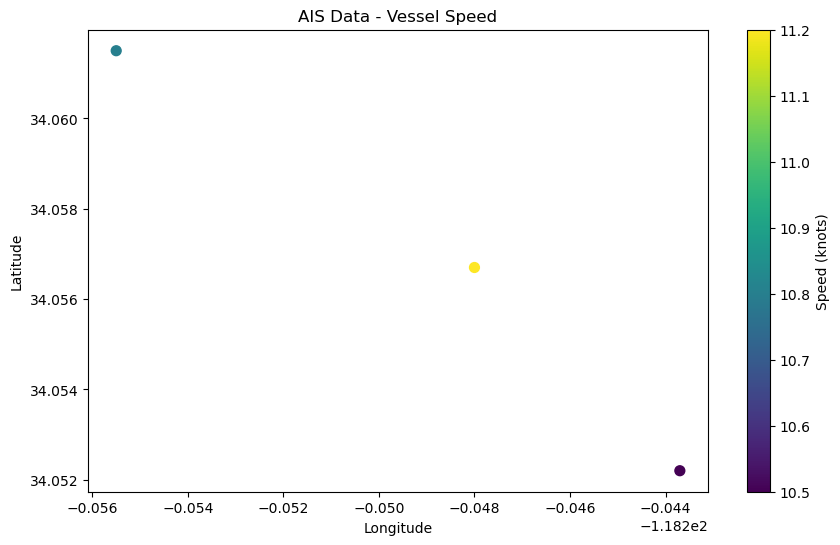

In [32]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Speed'], cmap='viridis', s=50)
plt.colorbar(label='Speed (knots)')
plt.title('AIS Data - Vessel Speed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [33]:
# Sample-based compression (e.g., keep every second data point)
compressed_df = df.iloc[::2]

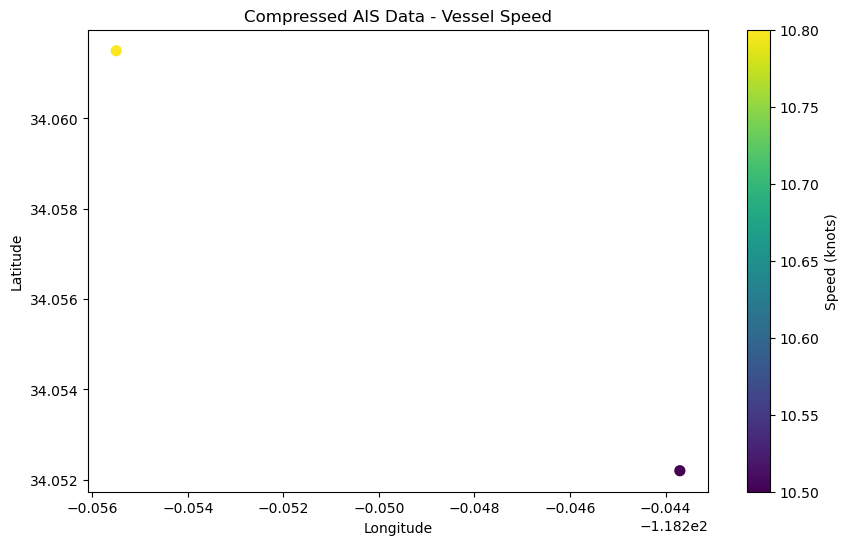

In [34]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(compressed_df['Longitude'], compressed_df['Latitude'], c=compressed_df['Speed'], cmap='viridis', s=50)
plt.colorbar(label='Speed (knots)')
plt.title('Compressed AIS Data - Vessel Speed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [35]:
from pyais import encode_dict

# Define data for Position Report message
data = {
    'mmsi': 123456789,
    'type': 1,
    'lat': 47.497675,
    'lon': -122.332077,
    'sog': 10.2,
    'cog': 180,
}

# Encode the message
encoded_message = encode_dict(data)

# Print the encoded message (list of fragments)
print(encoded_message)


['!AIVDO,1,1,,A,11mg=5@P00G@0QTK;Jc@00000000,0*1D']
